# 01_Data_Loading_and_EDA

#### Exploratory Data Analysis (EDA)


Predicting Student Drop-out & Academic Success – Data Loading & EDA


**Dataset overview**  
• **Records:** 4 424 student-semester entries  
• **Features:** 36 predictors (demographic, academic, macro)  
• **Target:** 1 target divided in 3 classes – Graduate, Dropout, Enrolled  
• **Missing values:** None detected  
• **Stray Headers:** He removed a tab from the header **Daytime/evening attendance** in the database for clarity and convenience

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
# Data into data-frame (df)
df = pd.read_csv('../data/data0.csv', sep=';')

df.columns = df.columns.str.strip() 

# Success Confirmation
print("Loaded data with shape: ", df.shape) 

Loaded data with shape:  (4424, 37)


In [36]:
dupes = df.duplicated().sum()
print(f"Duplicate rows: {dupes}")
if dupes:
    df = df.drop_duplicates()


Duplicate rows: 0


In [25]:
# Show the first five rows to verify headers & sample values
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
# Data types & missing
display(pd.DataFrame({
    'dtype': df.dtypes,
    'n_missing': df.isna().sum()
}))


,dtype,n_missing
Marital status,int64,0
Application mode,int64,0
Application order,int64,0
Course,int64,0
Daytime/evening attendance,int64,0
Previous qualification,int64,0
Previous qualification (grade),float64,0
Nacionality,int64,0
Mother's qualification,int64,0
Father's qualification,int64,0


> **Note:**  
> All columns are numeric or integer‐coded categories.  
> The Target is categorical.    
> No missing values detected.


In [41]:

code_cols = [
    'Marital status', 'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder',
    "Mother's occupation", "Father's occupation"
]
df[code_cols] = df[code_cols].astype('category')


num_summary = (
    df.select_dtypes('number')      
      .describe()
      .T
      .round(2)
)
display(num_summary)


cat_card = (
    df.select_dtypes('category')   
      .nunique()
      .sort_values(ascending=False)
)
display(cat_card.head(20))          



,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),4424.0,132.61,13.19,95.00,125.00,133.10,140.00,190.00
Admission grade,4424.0,126.98,14.48,95.00,117.90,126.10,134.80,190.00
Age at enrollment,4424.0,23.27,7.59,17.00,19.00,20.00,25.00,70.00
International,4424.0,0.02,0.16,0.00,0.00,0.00,0.00,1.00
Curricular units 1st sem (credited),4424.0,0.71,2.36,0.00,0.00,0.00,0.00,20.00
Curricular units 1st sem (enrolled),4424.0,6.27,2.48,0.00,5.00,6.00,7.00,26.00
Curricular units 1st sem (evaluations),4424.0,8.30,4.18,0.00,6.00,8.00,10.00,45.00
Curricular units 1st sem (approved),4424.0,4.71,3.09,0.00,3.00,5.00,6.00,26.00
Curricular units 1st sem (grade),4424.0,10.64,4.84,0.00,11.00,12.29,13.40,18.88
Curricular units 1st sem (without evaluations),4424.0,0.14,0.69,0.00,0.00,0.00,0.00,12.00


Father's occupation           46
Father's qualification        34
Mother's occupation           32
Mother's qualification        29
Nacionality                   21
Application mode              18
Course                        17
Previous qualification        17
Application order              8
Marital status                 6
Target                         3
Daytime/evening attendance     2
Educational special needs      2
Displaced                      2
Debtor                         2
Tuition fees up to date        2
Gender                         2
Scholarship holder             2
dtype: int64

In [42]:
df.info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   category
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance                      4424 non-null   category
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

* Total memory footprint is < 1 MB, so training multiple models with cross-validation is computationally light.


The task is imbalanced.

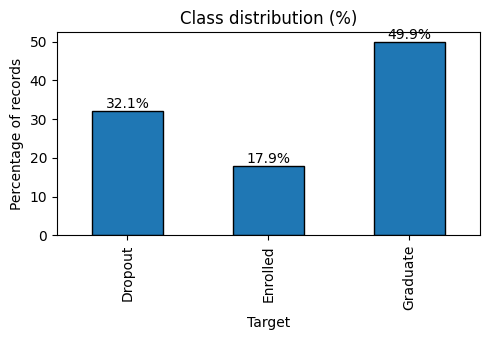

In [27]:
ax = (df["Target"]
      .value_counts(normalize=True)
      .sort_index()
      .mul(100)
      .plot(kind="bar", edgecolor="k", figsize=(5,3.5)))

ax.set_title("Class distribution (%)")
ax.bar_label(ax.containers[0], fmt="%.1f%%")
ax.set_ylabel("Percentage of records")
plt.tight_layout()



#### Class imbalance  
- **Graduate:** 50.0 %  
- **Dropout:** 32.1 %  
- **Enrolled:** 17.9 %  

> **Implication:** Models trained on this will be biased toward the majority class.  
> We will counteract this using `class_weight='balanced'` in tree‐based models and SMOTE for k-NN.


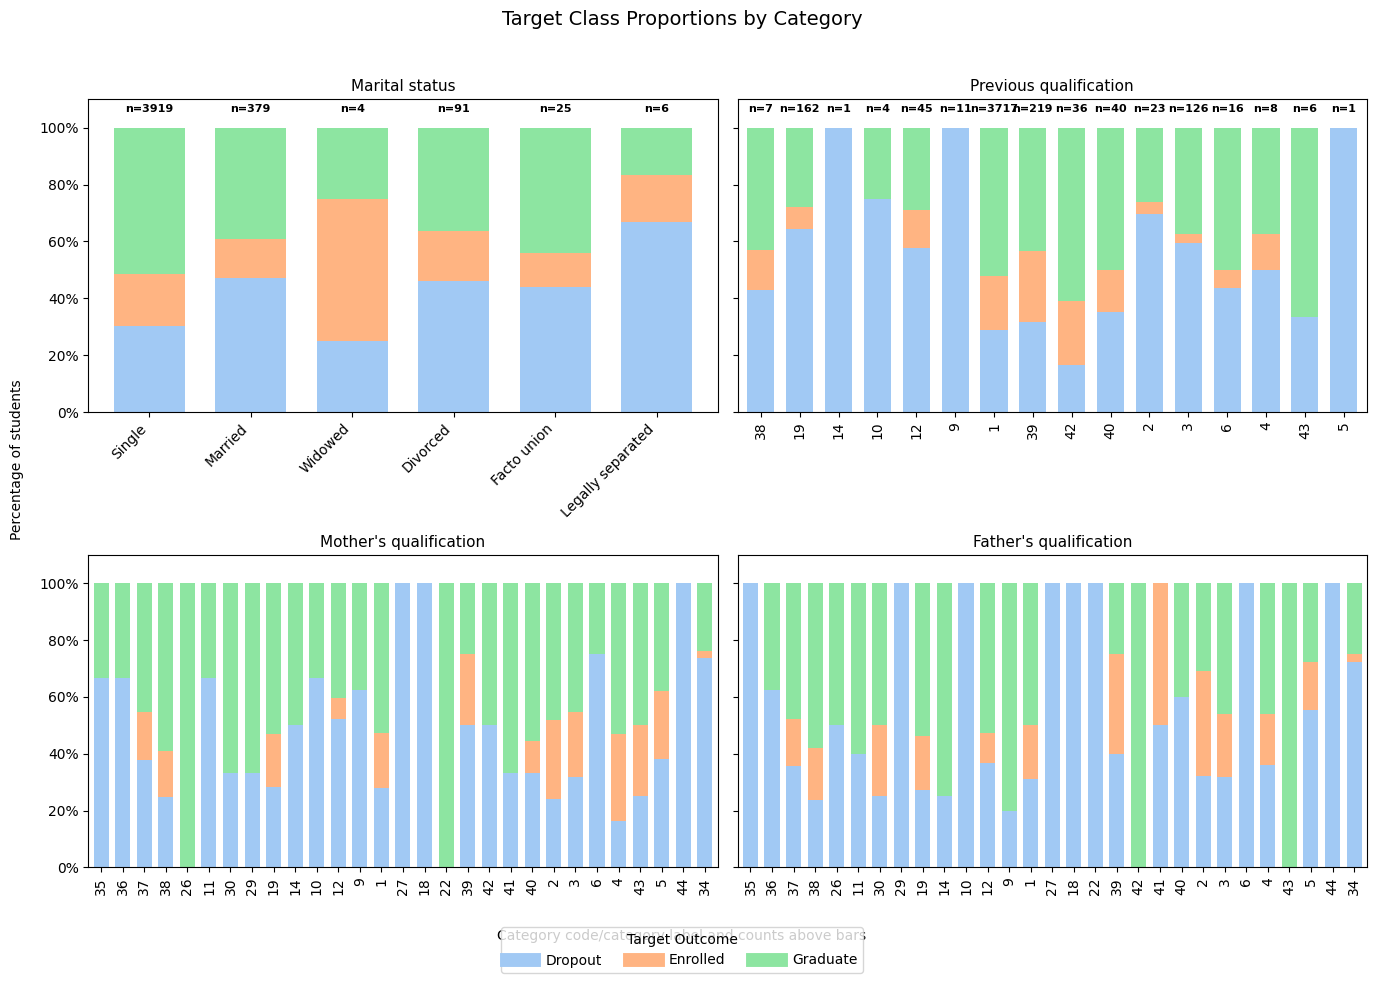

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Ensure df is loaded and cleaned above this cell:
# df = pd.read_csv(r"..\data\data0.csv", sep=";")
# df.rename(columns=lambda c: c.strip(), inplace=True)

# Soft pastel palette
pastel_colors = sns.color_palette("pastel", n_colors=3)
color_map = {"Dropout": pastel_colors[0], "Enrolled": pastel_colors[1], "Graduate": pastel_colors[2]}

# Qualification code order
qual_order = [35,36,37,38,26,11,30,29,19,14,10,12,9,1,27,18,22,39,42,41,40,2,3,6,4,43,5,44,34]

# Marital status mapping
marital_map = {
    1: "Single", 2: "Married", 3: "Widowed",
    4: "Divorced", 5: "Facto union", 6: "Legally separated"
}

cat_cols = ["Marital status", "Previous qualification", "Mother's qualification", "Father's qualification"]

fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for ax, col in zip(axes.flat, cat_cols):
    prop = (df.groupby([col, "Target"]).size()
               .unstack(fill_value=0)
               .apply(lambda x: 100 * x / x.sum(), axis=1))
    if col in ["Previous qualification", "Mother's qualification", "Father's qualification"]:
        prop = prop.reindex(qual_order).dropna(how="all")
    prop.plot(kind="bar", stacked=True, ax=ax, width=0.7,
              color=[color_map[t] for t in prop.columns])
    ax.set_title(col, fontsize=11)
    ax.yaxis.set_major_formatter(PercentFormatter())
    ax.set_xlabel("")
    ax.legend_.remove()
    
    # Annotate counts for marital & previous qual only
    if col in ["Marital status", "Previous qualification"]:
        counts = df[col].value_counts().reindex(prop.index).fillna(0).astype(int)
        ax.set_ylim(0, 110)
        for i, code in enumerate(prop.index):
            ax.text(i, 105, f"n={counts[code]}", ha="center", va="bottom",
                    fontweight="bold", fontsize=8)
    # Relabel x-ticks: map codes to labels for marital status only
    if col == "Marital status":
        labels = [marital_map.get(int(code), "") for code in prop.index]
        ax.set_xticklabels(labels, rotation=45, ha="right")

# Shared legend
fig.legend(handles=[plt.Line2D([], [], color=color_map[t], lw=10) for t in color_map],
           labels=list(color_map.keys()), title="Target Outcome",
           loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.02))

# Shared labels & title
fig.text(0.5, 0.02, "Category code/category label and counts above bars", ha="center")
fig.text(0.02, 0.5, "Percentage of students", va="center", rotation="vertical")
fig.suptitle("Target Class Proportions by Category", y=0.95, fontsize=14)

plt.tight_layout(rect=[0.03, 0.05, 1, 0.93])
plt.show()



### Categorical Patterns

> The charts regarding qualifications use codes that are equivalent to a certain level of education. Since the database we use doesn't organize these codes in a handy way (for example, 1,2,3 ... lower education levels and ... 42,43, 44 higher education levels), we had to organize these charts ourselves, meaning from left to right the education level that the codes represent increases.

- **Parents' qualification**: By just these graphics, we couldn't take any immediate conclusion about the relation between the parents' qualification and the target since we aren't looking at the pair mother and father. We still tried to look at this graph to see if there would be any immediate pattern, for example, if kids that had moms with higher levels of education had more success, but there wasn't any noticeable pattern. 

- **Previous qualification**: We noticed that kids that have a previous education between 1 (secondary education) and 43 (higher education - master's (2nd cycle)) are less likely to drop out, especially between 1 (secondary education) and 40 (higher education - degree (1st cycle)). This conclusion becomes even stronger when we look at the elevated number of students in this section, meaning that there is an actual tendency in a large sample.

- **Marital status** : Regarding the marital status the most common is the student being single and is also the one with the highest gradute percentage.


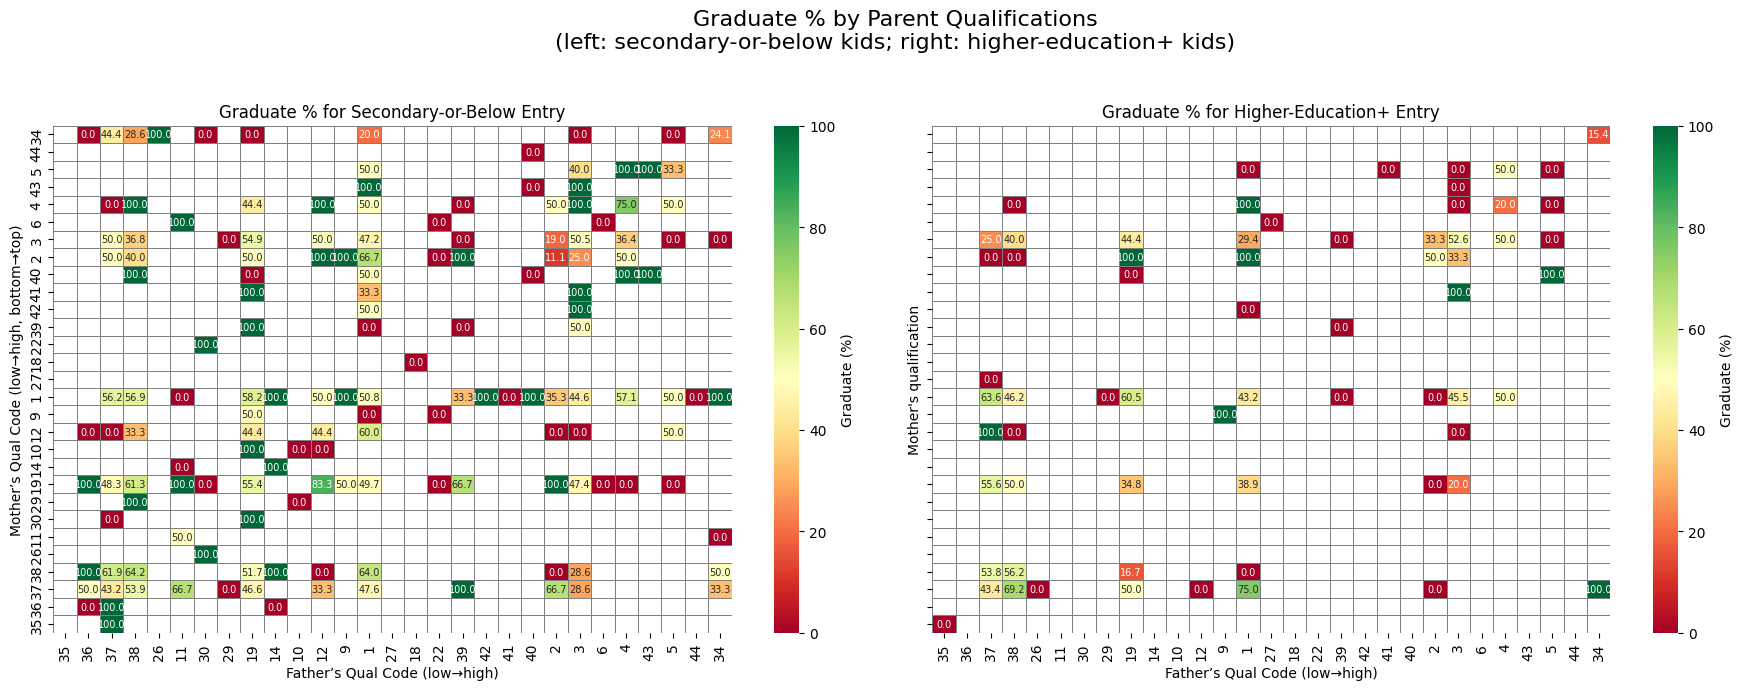

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Assume df is loaded & cleaned already)

low_codes = [1, 9, 10, 12, 14, 15, 19, 38]
high_codes = [2, 3, 4, 5, 6, 39, 40, 42, 43]
qual_order = [
    35,36,37,38,26,11,30,29,19,14,10,12,9,1,
    27,18,22,39,42,41,40,2,3,6,4,43,5,44,34
]
mother_order = qual_order[::-1]
father_order = qual_order

def grad_pct_matrix(df_subset):
    ct = pd.crosstab(
        [df_subset["Mother's qualification"], df_subset["Father's qualification"]],
        df_subset["Target"]
    )
    pct = ct.div(ct.sum(axis=1), axis=0) * 100
    return pct["Graduate"].unstack().reindex(index=mother_order, columns=father_order)

mat_low  = grad_pct_matrix(df[df["Previous qualification"].isin(low_codes)])
mat_high = grad_pct_matrix(df[df["Previous qualification"].isin(high_codes)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
plt.subplots_adjust(wspace=0.3)

sns.heatmap(
    mat_low, mask=mat_low.isna(), cmap="RdYlGn",
    annot=True, fmt=".1f", linewidths=0.5, linecolor="gray",
    cbar_kws={"label": "Graduate (%)"}, ax=ax1
)
ax1.set_title("Graduate % for Secondary-or-Below Entry", fontsize=12)
ax1.set_xlabel("Father’s Qual Code (low→high)")
ax1.set_ylabel("Mother’s Qual Code (low→high, bottom→top)")

sns.heatmap(
    mat_high, mask=mat_high.isna(), cmap="RdYlGn",
    annot=True, fmt=".1f", linewidths=0.5, linecolor="gray",
    cbar_kws={"label": "Graduate (%)"}, ax=ax2
)
ax2.set_title("Graduate % for Higher-Education+ Entry", fontsize=12)
ax2.set_xlabel("Father’s Qual Code (low→high)")

# Shrink all annotation texts to 5pt
for ax in (ax1, ax2):
    for txt in ax.texts:
        txt.set_fontsize(7)

plt.suptitle(
    "Graduate % by Parent Qualifications\n"
    "(left: secondary-or-below kids; right: higher-education+ kids)",
    fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


We decided to look further to see if there was a relation between the parents' qualifications and the target, but now we have both parents in consideration at the same time. Here the top right corner means both parents have higher educations, and the lower left corner means both parents have lower educations. The code 34 is the exception since it represents that the level of education is unknown.

Again, we didn't find any immediate pattern that related the parents' qualifications to the target.
 
Just to be sure, we decided to see if the parents' education would at least influence the previous level of education that a student has, since it has a different weight for a student to drop out of high school than dropping out of a master's degree, for example.

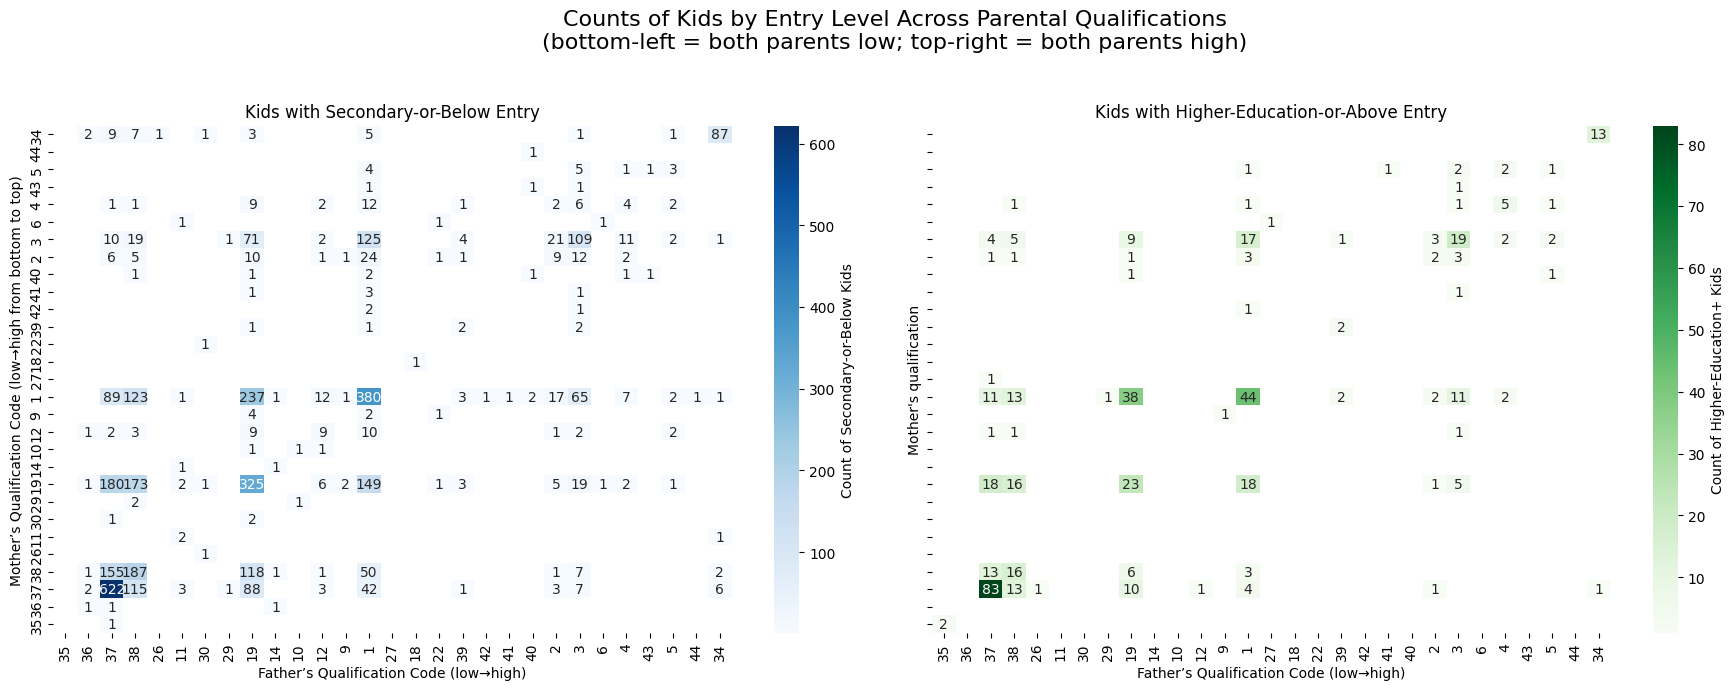

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load & clean your DataFrame (run first)
df = pd.read_csv(r"..\data\data0.csv", sep=";")
df.rename(columns=lambda c: c.strip(), inplace=True)

# 2. Define child entry-level groups
low_codes = [1, 9, 10, 12, 14, 15, 19, 38]     # Secondary-or-below
high_codes = [2, 3, 4, 5, 6, 39, 40, 42, 43]   # Higher-education+

# 3. Use your provided qual_order
qual_order = [
    35,36,37,38,26,11,30,29,19,14,10,12,9,1,
    27,18,22,39,42,41,40,2,3,6,4,43,5,44,34
]

# 4. Build count matrices and reindex
def build_mat(codes):
    mat = (
        df[df["Previous qualification"].isin(codes)]
          .groupby(["Mother's qualification","Father's qualification"])
          .size()
          .unstack(fill_value=0)
    )
    # reindex with mother inverted, father normal
    return mat.reindex(
        index=qual_order[::-1],   # mother low→bottom, high→top
        columns=qual_order,       # father low→left, high→right
        fill_value=0
    )

low_mat  = build_mat(low_codes)
high_mat = build_mat(high_codes)

# 5. Mask off empty cells
mask_low  = low_mat  == 0
mask_high = high_mat == 0

# 6. Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7), sharey=True)
plt.subplots_adjust(wspace=0.3)

sns.heatmap(
    low_mat,
    mask=mask_low,
    cmap="Blues",
    annot=True, fmt="d",
    ax=ax1,
    cbar_kws={"label": "Count of Secondary-or-Below Kids"}
)
ax1.set_title("Kids with Secondary-or-Below Entry")
ax1.set_xlabel("Father’s Qualification Code (low→high)")
ax1.set_ylabel("Mother’s Qualification Code (low→high from bottom to top)")

sns.heatmap(
    high_mat,
    mask=mask_high,
    cmap="Greens",
    annot=True, fmt="d",
    ax=ax2,
    cbar_kws={"label": "Count of Higher-Education+ Kids"}
)
ax2.set_title("Kids with Higher-Education-or-Above Entry")
ax2.set_xlabel("Father’s Qualification Code (low→high)")

plt.suptitle(
    "Counts of Kids by Entry Level Across Parental Qualifications\n"
    "(bottom-left = both parents low; top-right = both parents high)",
    fontsize=16
)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


With this graphic we could finally conclude that most of the students in this sample have a previous education in secondary school or lower, and that a lot of the students, in both graphics, have both parents with a qualification 37 (Basic education 1st cycle (4th/5th year) or equiv.), which could be related to the generation of which the parents are part of. These 622 students on the left graphic have 43.2% of graduates and the surronding 155 (61.9% graduates), 187 (64.2%) and 115(53.9%), which may indicate that lower educated parents might not influence the level of education or success of the kids. 

This conclusion is backed up by the fact that if we look at other concentrations of students with parents with slightly higher education levels, like, for example, in the combination of mother and father with 1 (secondary education) or 19 (basic education 3rd cycle (9th/10th/11th year) or equivalent) levels of education, we see that their percentages are similar to the previous ones on the left graphic. Here we find 325 students with 55.4% graduates (both parents with basic education, 3rd cycle (19)), 237 with 58.2%, 149 with 49.7%, and 380 with 50.8% (both parents with secondary education (1)). Or if we go even higher, we have a significant number of students with both parents with qualifications of type 3 (higher Education - Degree) and those 109 students still only show 50.5% of graduates.

The points of most concentration of students with higher education, as seen in the graphic on the right, are similar in position to the points on the graphic on the left (combination of mothers' and fathers' qualifications) and also show similar results but with slightly lower percentages of graduates, which might be related to the significantly smaller sample size and to the significantly increased difficulty of the degree, which may cause fewer graduates. 

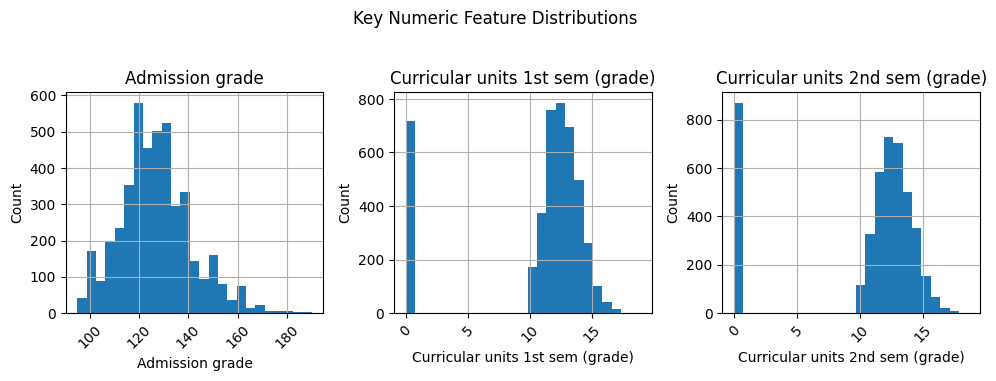

In [31]:
num_cols = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
]

# Create histograms and capture Axes
axes = df[num_cols].hist(figsize=(10,6), bins=25, layout=(2,3))

# Loop through each Axes and set labels
for ax, col in zip(axes.flatten(), num_cols):
    ax.set_xlabel(col)      # x-axis: the feature values
    ax.set_ylabel('Count')  # y-axis: number of records
    ax.tick_params(axis='x', rotation=45)  # rotate x-labels if needed

plt.suptitle('Key Numeric Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()



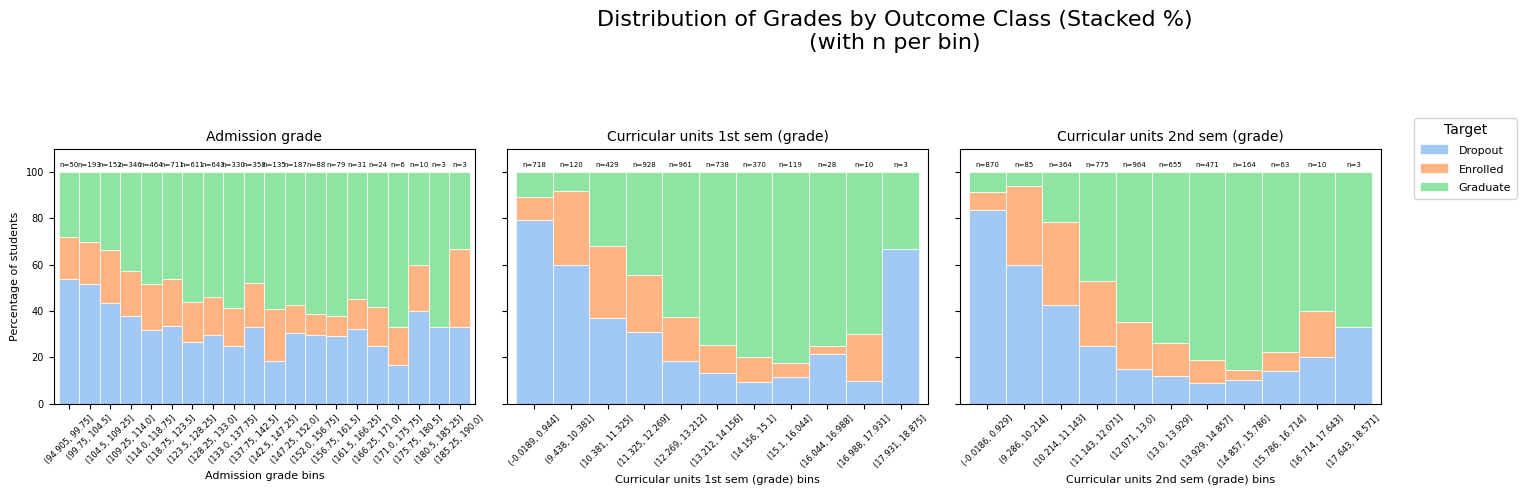

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assumes df is already loaded and cleaned in your notebook

# 1. Define features and bins
num_cols = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
]
n_bins = 20

# Soft pastel colors for Targets
palette = {'Dropout': sns.color_palette("pastel")[0],
           'Enrolled': sns.color_palette("pastel")[1],
           'Graduate': sns.color_palette("pastel")[2]}

# 2. Create stacked percentage histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
plt.subplots_adjust(wspace=0.3)

for ax, col in zip(axes, num_cols):
    # Bin the feature
    binned = pd.cut(df[col], bins=n_bins)
    prop = (
    df.assign(bin=binned)
      .groupby(['bin','Target'], observed=True)
      .size()
      .unstack(fill_value=0)
      .apply(lambda x: 100 * x / x.sum(), axis=1)
)

    
    # Plot stacked bar chart
    prop.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=1.0,
        color=[palette[t] for t in prop.columns],
        edgecolor='white',
        linewidth=0.5
    )

    
    # Compute total counts per bin from the temporary Series:
    counts = binned.value_counts().reindex(prop.index).fillna(0).astype(int)
    
    # Extend y-axis to make room
    ax.set_ylim(0, 110)
    
    # Annotate total counts above each bar
    for i, b in enumerate(prop.index):
        ax.text(i, 102, f"n={counts[b]}", ha='center', va='bottom', fontsize=5)
    
    # Formatting
    ax.set_title(col, fontsize=10)
    ax.set_xlabel(col + ' bins', fontsize=8)
    ax.set_ylabel('Percentage of students', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=6)
    ax.tick_params(axis='y', labelsize=7)
    ax.legend_.remove()

# Shared legend
leg = axes[-1].legend(title='Target', loc='upper center', bbox_to_anchor=(1.2, 1.15), ncol=1)
plt.setp(leg.get_texts(), fontsize=8)
leg.get_title().set_fontsize(10)

plt.suptitle('Distribution of Grades by Outcome Class (Stacked %)\n(with n per bin)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()


## Key Numeric Feature Distributions

### 1. Admission Grade

- **Observation**: Grades cluster between 110–140, with a tail extending toward ~180.  
- **Deeper view**:  
  - In the **lowest bins (<105)**, dropouts make up a majority (>50 %).  
  - In the **115–135** range, graduates become the single largest group (40–60 %), but dropouts and still‐enrolled remain non-negligible.  
  - Even in the **highest bins (>145)**, while graduates dominate, there is still a small share of dropouts and enrolled students—so exceptionally high admission scores are *strong* but not *perfect* predictors.  
- **Takeaway**: Admission grade has a clear positive association with graduation probability—but note that even top‐scoring students can drop out or delay completion.




### 2. 1st-Semester Grade

- **Observation**: Spike at 0 (likely non-enrollment or missing), then a tight band between 12–15.  
- **Deeper view**:  
  - The **0-grade bin** is predominantly dropouts (>70 %).  
  - Students with **any passing grade (10–12)** see the graduate share jump to ~40–60 %.  
  - In **12–15**, graduates exceed ~70 %, with dropouts becoming rare.  
- **Takeaway**: Students who manage to earn any grade (i.e. move out of the “0” group) in their first semester are much more likely to graduate. In contrast, those who finish semester 1 with a zero grade—meaning they never completed or recorded any course—have a very high dropout risk. The 1-semester grade is a good indicator to predict the target.




### 3. 2nd-Semester Grade

- **Observation**: Similar to S1: spike at 0, then grades 11–15.  
- **Deeper view**:  
  - **0-grade** remains mostly dropout (~60 %).  
  - At **10–12**, outcomes are mixed; from **13–15**, graduates rise above ~80 %.  
- **Takeaway**: Doing well in your second semester is an even stronger sign you’ll graduate. If a student records a non-zero grade in semester 2—and especially a high grade—they almost always go on to complete their studies. Conversely, failing to earn any grade in semester 2 (staying at zero) is a warning sign of likely dropout.




## In conclusion

- **Admission grade** provides a **baseline risk stratification**: higher entry scores → higher graduation rates, but not a guarantee.  
- **Semester grades** act as **early-warning** signals: a zero suggests high dropout risk, whereas even modest passing grades boost graduation odds substantially.    

Macro‐economic summary stats by Target:



Unemployment rate                  Inflation rate                  \
                      mean   std  min   max           mean   std  min  max   
Target                                                                       
Dropout              11.62  2.77  7.6  16.2           1.28  1.40 -0.8  3.7   
Enrolled             11.27  2.63  7.6  16.2           1.21  1.37 -0.8  3.7   
Graduate             11.64  2.60  7.6  16.2           1.20  1.37 -0.8  3.7   

           GDP                    
          mean   std   min   max  
Target                            
Dropout  -0.15  2.25 -4.06  3.51  
Enrolled  0.05  2.32 -4.06  3.51  
Graduate  0.08  2.26 -4.06  3.51

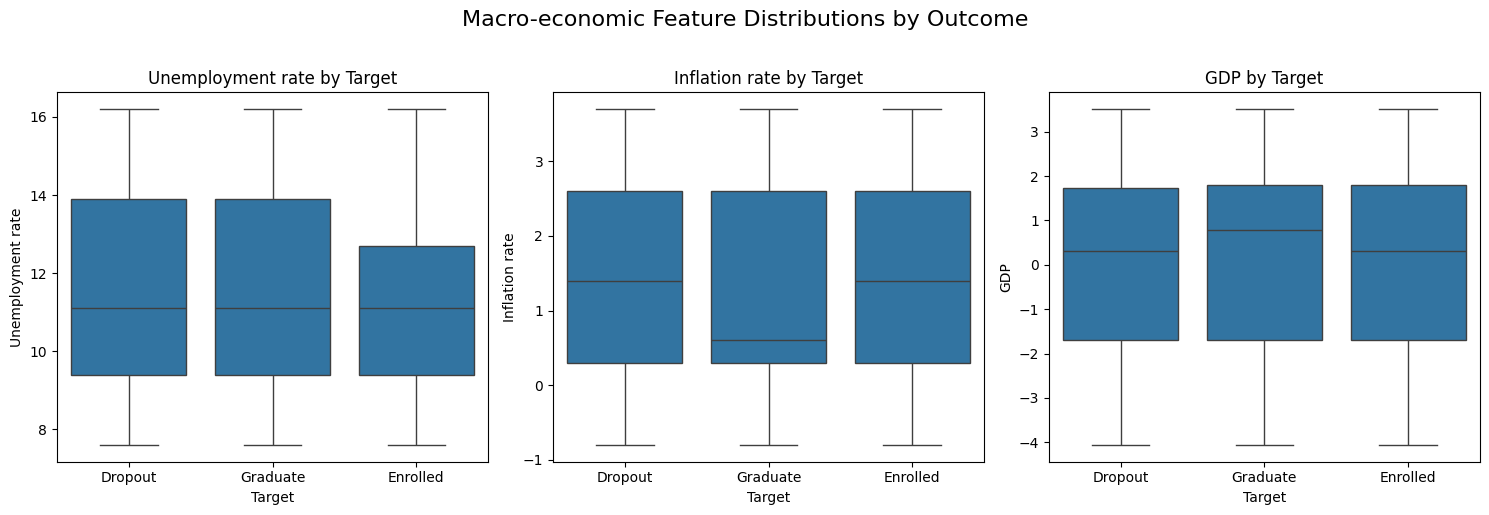

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select macro features
macro_cols = ["Unemployment rate", "Inflation rate", "GDP"]

# 1. Boxplots for each macro feature by Target class
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
for ax, col in zip(axes, macro_cols):
    sns.boxplot(x="Target", y=col, data=df, ax=ax)
    ax.set_title(f"{col} by Target")
    ax.set_xlabel("Target")
    ax.set_ylabel(col)
plt.suptitle("Macro-economic Feature Distributions by Outcome", fontsize=16, y=1.02)
plt.tight_layout()

# 2. Summary statistics
macro_stats = (
    df.groupby("Target")[macro_cols]
      .agg(["mean", "std", "min", "max"])
      .round(2)
)
print("Macro‐economic summary stats by Target:\n")
display(macro_stats)


### Interpretation of Macro-economic Indicators vs. Student Outcomes

Unemployment Rate

- Mean/Average: Dropouts (in the year of enrollement there was on average 11.6 % of unemployment rate), Graduates (in the year of enrollement there was on average 11.6 % of unemployment rate), Enrolled (in the year of enrollement there was on average 11.3 % of unemployment rate)

- Spread: All three classes span roughly 7.6 %–16.2 % unemployment, with very similar IQRs (~2.6 %–2.8 %).

- Takeaway: The unemployment rate in the year of enrollment does not appear to significantly influence academic outcomes—graduates, dropouts, and still-enrolled students all exhibit very similar means and medians.

Inflation Rate

- Mean/Average: Graduates (~1.2 % in the year of enrollement), Dropouts (~1.3 % in the year of enrollement), Enrolled (~1.2 % in the year of enrollement)

- Range: –0.8 % to +3.7 % across all classes

- Takeaway: Inflation rates show virtually no differentiation across the three outcome groups—dropouts, graduates, and still-enrolled students all share almost identical mean values. Although graduates have a noticeably lower median, their average is pulled up by a few extreme inflation years. In contrast, the other groups exhibit more uniform distributions. Overall, inflation has little direct bearing on academic outcome.

GDP Growth

- Mean/Average: Graduates (0.1 %), Dropouts (–0.1 %), Enrolled (~0.05 %)

- Range: –4.1 % to +3.5 % for every group

- Takeaway: Graduates tend to enroll during marginally stronger GDP growth years (average just above 0 %), whereas dropouts experience the weakest. However, the distributions overlap so heavily that GDP is only a subtle predictor.

Overall Conclusion

While there is a slight tendency for better economic conditions (lower unemployment, modestly positive GDP) to coincide with higher graduation shares, the overlap between the distributions is so large that macro-economic features by themselves are insufficient to reliably distinguish between Graduates, Dropouts, and Enrolled students.

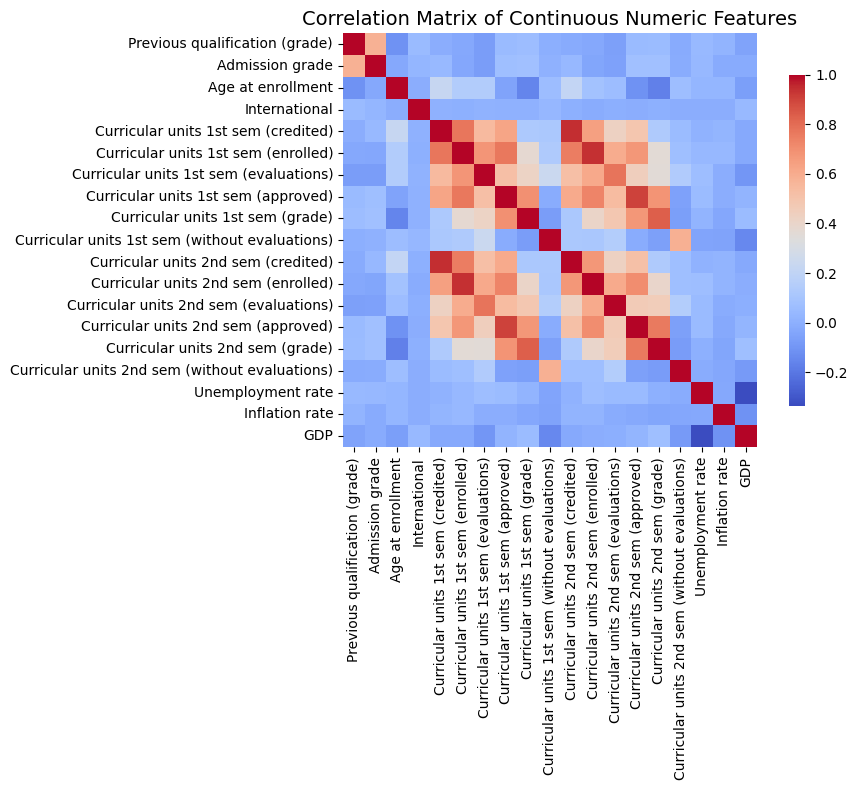

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. List all integer‐coded categorical columns to drop
code_cols = [
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    "Mother's occupation",
    "Father's occupation",
    'Target'
]

# 2. Select only true continuous numeric columns
cont_cols = [
    col for col in df.select_dtypes(include='number').columns
    if col not in code_cols
]

# 3. Compute and plot
corr = df[cont_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,     
    cmap="coolwarm",
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Matrix of Continuous Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


## Correlation Matrix of Continuous Features

1. **High multicollinearity among semester metrics**  
   - All **“Curricular units 1st sem”** measures (credited, enrolled, evaluations, approved, grade, without evaluations) correlate very strongly (ρ ≈ 0.8–1.0) with each other.  
   - The same tight cluster appears for the **“2nd sem”** metrics.  
   - **Implication:** You only need one or two representative features from each semester (e.g. the final grade or number of approved units) to avoid redundant inputs.

2. **Moderate link between prior and entry performance**  
   - **Previous qualification (grade)** correlates moderately with **Admission grade** (ρ ≈ 0.5).  
   - Both of these correlate weakly (ρ ≈ 0.2–0.3) with first‐semester grades.  
   - **Implication:** Students’ background grades carry some predictive signal for entry performance, but first‐semester outcomes add new information.

3. **Weak macro‐economic signals**  
   - **Unemployment**, **Inflation**, and **GDP** all show near-zero correlations (|ρ| < 0.1) with the academic features.  
   - **Implication:** These features are largely orthogonal to grades and will serve only as marginal predictors.

4. **Low correlation for demographic variables**  
   - **Age at enrollment** has only small correlations (|ρ| < 0.2) with any academic metric.  
   - **International** student flag (binary) also shows near-zero correlations.  
   - **Implication:** These demographic features may add incremental value but are not substitutes for performance indicators.


**Overall takeaway:**  

- The **strongest signals** lie within each semester’s performance cluster and between admission and prior qualifications.  
- To **reduce dimensionality**, consider dropping or combining redundant semester metrics (e.g., keep only the grade and approved‐units count).  
- **Macro‐economic** and **demographic** variables appear largely independent of academic performance and should be treated as secondary features.  
  


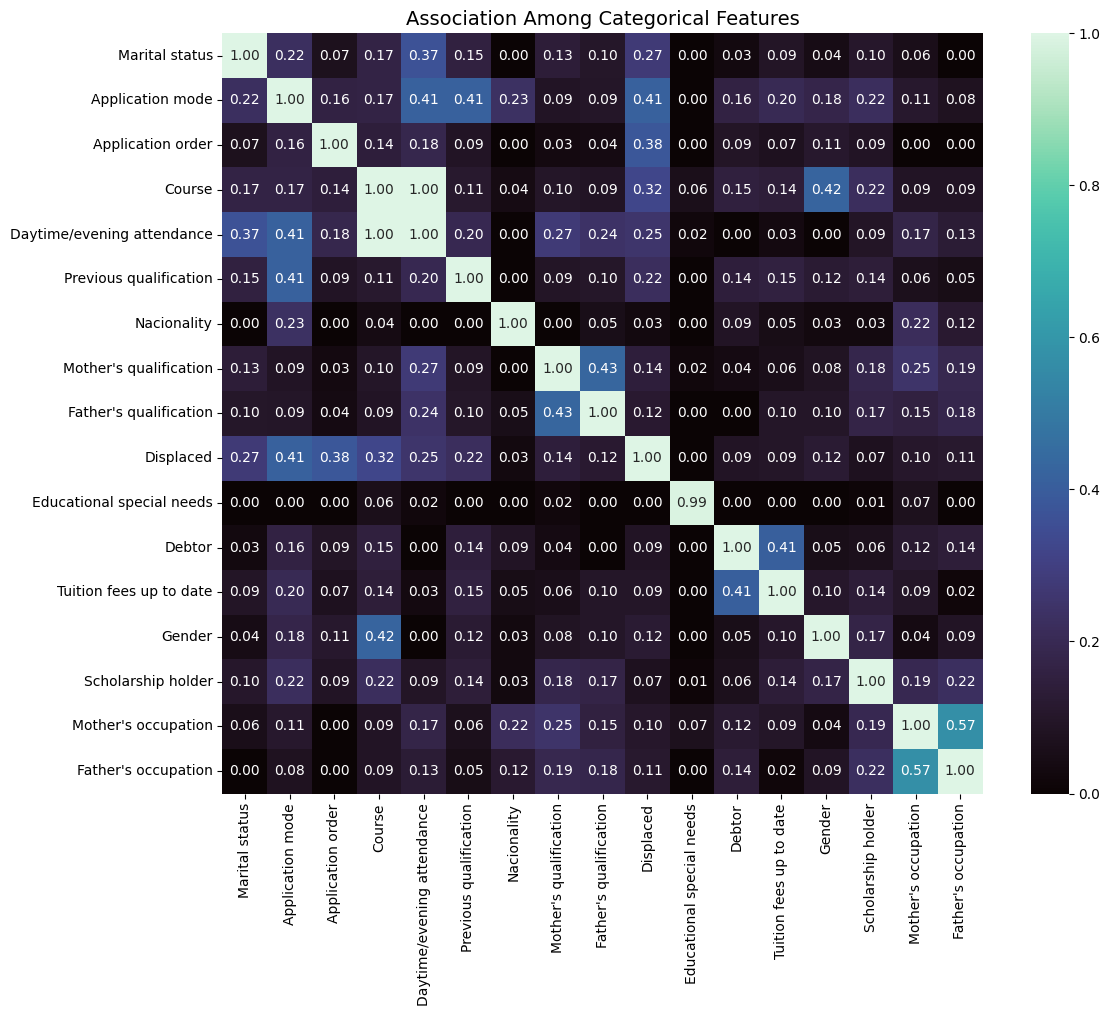

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assume df is already loaded and cleaned

# List of categorical code columns
code_cols = [
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    "Mother's occupation",
    "Father's occupation"
]

# Function to compute Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute pairwise Cramer's V
cramers_mat = pd.DataFrame(index=code_cols, columns=code_cols, dtype=float)
for col1 in code_cols:
    for col2 in code_cols:
        cramers_mat.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_mat.astype(float), annot=True, fmt=".2f", cmap="mako", square=True)
plt.title("Association Among Categorical Features", fontsize=14)
plt.tight_layout()
plt.show()


## Associations Among Categorical Features


1. **Nearly perfect pairs**  
   - **Course ↔ Daytime/evening attendance** (V≈1.00): these two fields are effectively identical in our dataset—students in each course only attend either “daytime” or “evening,” so one can be dropped.  
   - **Educational special needs** self-correlation (1.00) is trivial and can be ignored.

2. **Strong parent–child links**  
   - **Mother’s qualification ↔ Father’s qualification** (V≈0.43): parental education levels tend to match, so including both may add redundancy.  
   - **Mother’s occupation ↔ Father’s occupation** (V≈0.57): parental occupations co‐vary even more strongly—consider combining into a single socio‐economic index.

3. **Financial flag overlap**  
   - **Debtor ↔ Tuition fees up to date** (V≈0.41): students behind on fees are often flagged as debtors—these two features capture similar financial strain signals.

4. **Moderate links**  
   - **Application mode ↔ Previous qualification** (V≈0.41): how a student applies is somewhat related to their prior degree.  
   - **Displaced** has moderate associations (V≈0.30–0.40) with several features—being displaced correlates with certain course choices and application behaviors.

5. **Low associations with Target**  
   - None of these categorical codes show a “very high” association with each other (outside the near-1.0 pairs) or with the target itself, indicating they each carry some unique information.


### Modeling Implications

- **Drop one of each nearly-identical pair** (e.g., course vs. attendance).  
- **Combine strongly correlated parental features** into composite indices or apply dimensionality reduction (e.g., one “parental education” feature rather than separate mom/dad fields).  
- **Be cautious** of multicollinearity if using linear models; tree-based methods will handle it natively.  
- **Retain** moderately correlated variables only after assessing incremental predictive power via feature‐selection or regularization.  



## Key take-aways & hand-off to 02_Preprocessing_and_Modeling

* **Dataset integrity**  
  * 4 424 rows, 37 columns – no duplicates, no missing values.  
  * Memory footprint ≈ 744 KB; fits entirely in RAM for grid-search CV.

* **Feature taxonomy**  
  * **Categorical:** 18 `category` columns (IDs, flags, ordinal levels).  
  * **Numeric:** 12 `int64` count features + 7 `float64` continuous grades / macro-rates.  

* **Planned preprocessing pipeline**  
  * `ColumnTransformer`  
    * **Numeric branch:** `StandardScaler()` (needed for k-NN & SVM).  
    * **Categorical branch:**  
      * Nominal → `OneHotEncoder(handle_unknown='ignore')`  
      * Ordinal (parent qualification levels) → `OrdinalEncoder` with custom order.  
  * **No imputation step** (zero missing values).  
  * **Feature pruning / aggregation**  
    * Drop `Daytime/evening attendance` (fully redundant with `Course`).  
    * Retain one *grade* + one *approved-units* metric per semester to cut multicollinearity.

* **Data split & class imbalance**  
  * 75 / 15 /15  train-validation-test.  
  * Handle imbalance (≈ 32.1% dropout, ≈ 17.9% enrolled and ≈ 50% graduate) with `class_weight='balanced'` and SMOTE for k-NN.

* **Models & hyper-parameter search (next notebook)**  
  * Decision Tree (`GridSearchCV`, depth & min-samples).  
  * k-Nearest Neighbors (k, distance metric, weights).  
  * Support Vector Machine (C, γ, kernel).  
  * 5-fold **StratifiedKFold** CV for fair comparison; record train/predict times.

* **Evaluation & reporting**  
  * Metrics: Accuracy, Precision, Recall, F1-macro, confusion matrices.  
  * Additional: ROC/PR curves, learning curves (train vs. validation error).  
  * Compare CV mean ± std and final test-set performance in tables & plots.


